## Eksplorasi Data: Memahami Data dengan Statistik - Part 1

In [2]:
# Import Library
import pandas as pd

# Load Dataset
dataset = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv")

# Print dimensi dataset
print(f"Shape dataset terdiri dari {dataset.shape[0]} baris {dataset.shape[1]} kolom")

# Print 5 data teratas dataset
print("\n5 dataset teratas: ")
display(dataset.head())

# Print informasi dataset
print("\nInformasi dataset:\n ")
print(dataset.info())

# Print statistik deskriptif dataset
print("\nStatistik deskriptif:\n")
display(dataset.describe().T)

Shape dataset terdiri dari 12330 baris 18 kolom

5 dataset teratas: 


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False



Informasi dataset:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


## 

## Eksplorasi Data: Memahami Data dengan Statistik - Part 2

In [3]:
# Korelasi dataset
dataset_corr = dataset.select_dtypes(include=["number","bool"]).corr()
print(f"Korelasi dataset:/n")
display(dataset_corr)

# Distribusi label
print(f"Distribusi label (Revenue): \n {dataset['Revenue'].value_counts()}")

# Tugas praktek
print(f"\nKorelasi BounceRates-ExitRates: {dataset_corr.loc['BounceRates','ExitRates']}")
print(f"\nKorelasi Revenue-PageValues: {dataset_corr.loc['Revenue','PageValues']}")
print(f"\nKorelasi TrafficType-Weekend: {dataset_corr.loc['TrafficType','Weekend']}")

Korelasi dataset:/n


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,-0.006459,-0.025243,-0.005680,-0.033748,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,-0.007425,-0.015525,-0.005681,-0.014487,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,-0.009435,-0.038257,-0.029442,-0.034510,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,-0.009596,-0.019346,-0.027244,-0.024731,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.004193,-0.013326,-0.038318,-0.043235,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.002885,-0.007549,-0.033263,-0.036538,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,0.023965,-0.016009,-0.006731,0.078894,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,0.014745,-0.004407,-0.008836,0.078998,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Distribusi label (Revenue): 
 Revenue
False    10422
True      1908
Name: count, dtype: int64

Korelasi BounceRates-ExitRates: 0.9134364214595573

Korelasi Revenue-PageValues: 0.49256929525120574

Korelasi TrafficType-Weekend: -0.0022212292430310644


# Eksplorasi Data: Memahami Data dengan Visual

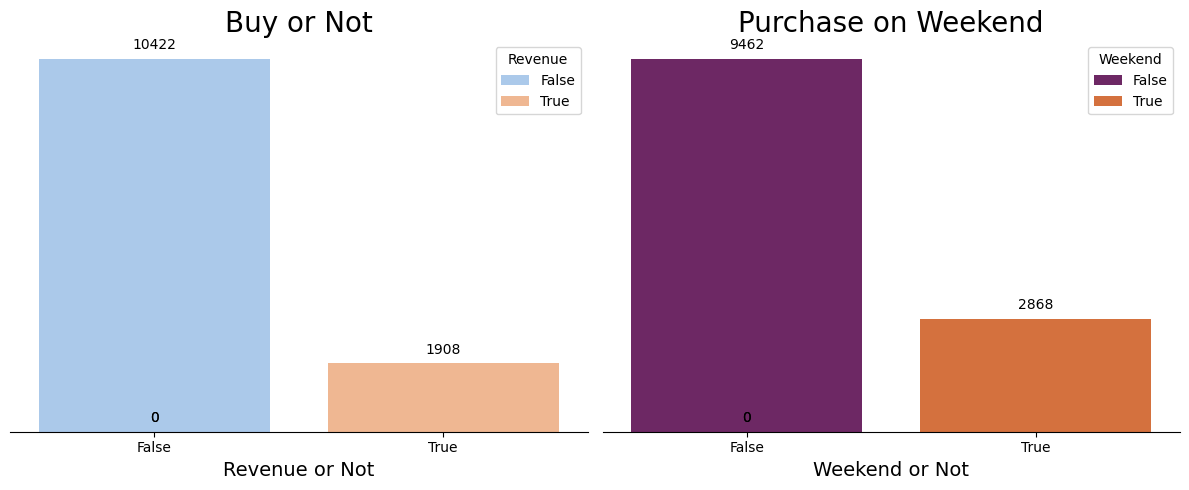

In [4]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the distribution of customers on Revenue
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
sns.countplot(
  x=dataset['Revenue'],
  hue=dataset['Revenue'],
  palette='pastel',
  ax=axs[0]
  )
axs[0].set_title(
  'Buy or Not',
  fontsize=20
)
axs[0].set_xlabel(
  'Revenue or Not',
  fontsize=14
  )

# Menghilangkan sumbu y
axs[0].set_ylabel('')  # Menghapus label sumbu y
axs[0].set_yticks([])  # Menghilangkan ticks sumbu y

# Menambahkan nilai count di atas bar
for p in axs[0].patches:
    axs[0].annotate(
        f'{int(p.get_height())}',  # Nilai count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
        ha='center',  # Posisi horizontal (center)
        va='center',  # Posisi vertikal (center)
        xytext=(0, 10),  # Jarak teks dari bar
        textcoords='offset points'  # Koordinat teks
    )

# Menghapus garis sumbu y (kiri) dan garis di bawah judul (atas)
axs[0].spines['left'].set_visible(False)  # Menghilangkan garis kiri (sumbu y)
axs[0].spines['top'].set_visible(False)   # Menghilangkan garis atas
axs[0].spines['right'].set_visible(False) # Opsional: Menghilangkan garis kanan

sns.countplot(
  x=dataset['Weekend'],
  hue=dataset['Weekend'],
  palette='inferno',
  ax=axs[1]
  )
axs[1].set_title(
  'Purchase on Weekend',
  fontsize=20
)
axs[1].set_xlabel(
  'Weekend or Not',
  fontsize=14
  )

# Menghilangkan sumbu y
axs[1].set_ylabel('')  # Menghapus label sumbu y
axs[1].set_yticks([])  # Menghilangkan ticks sumbu y

# Menambahkan nilai count di atas bar
for p in axs[1].patches:
    axs[1].annotate(
        f'{int(p.get_height())}',  # Nilai count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
        ha='center',  # Posisi horizontal (center)
        va='center',  # Posisi vertikal (center)
        xytext=(0, 10),  # Jarak teks dari bar
        textcoords='offset points'  # Koordinat teks
    )

# Menghapus garis sumbu y (kiri) dan garis di bawah judul (atas)
axs[1].spines['left'].set_visible(False)  # Menghilangkan garis kiri (sumbu y)
axs[1].spines['top'].set_visible(False)   # Menghilangkan garis atas
axs[1].spines['right'].set_visible(False) # Opsional: Menghilangkan garis kanan

# Menampilkan plot
plt.tight_layout()
plt.show()

# Tugas Praktek

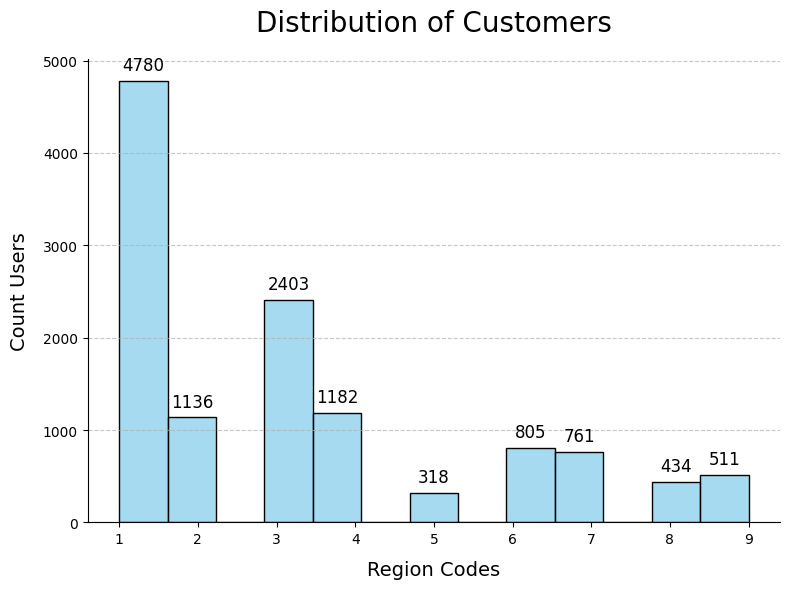

In [5]:
# Visualizing The Distribution of Customers Around The Region
fig, axs = plt.subplots(1, 1, figsize=(8, 6))  # Ukuran figure diperbesar

# Membuat histogram dengan warna yang lebih menarik
sns.histplot(
    data=dataset,
    x="Region",
    ax=axs,
    color='skyblue',  # Warna histogram
    edgecolor='black',  # Warna tepi bar
    binwidth=0.6,  # Lebar bin disesuaikan
)

# Menambahkan nilai count di atas setiap bar
for p in axs.patches:
    if p.get_height() > 0:  # Hanya menambahkan anotasi jika nilai count > 0
        axs.annotate(
            f'{int(p.get_height())}',  # Nilai count
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
            ha='center',  # Posisi horizontal (center)
            va='bottom',  # Posisi vertikal (bottom)
            xytext=(0, 5),  # Jarak teks dari bar
            textcoords='offset points',  # Koordinat teks
            fontsize=12,  # Ukuran font teks
            color='black'  # Warna teks
        )

# Judul dan label
axs.set_title("Distribution of Customers", fontsize=20, pad=20)  # Pad untuk jarak judul
axs.set_xlabel("Region Codes", fontsize=14, labelpad=10)  # Labelpad untuk jarak label
axs.set_ylabel("Count Users", fontsize=14, labelpad=10)

# Menghilangkan garis tepi (spines) yang tidak diperlukan
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# Menambahkan grid untuk meningkatkan keterbacaan
axs.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Data Pre-Processing: Handling Missing Value - Part 1

In [6]:
# Checking missing value for each features
print("Checking missing value for each features:")
print(dataset.isnull().sum())

# Counting total missing value
print("\nCounting total missing value:")
print(dataset.isnull().sum().sum()) # Total missing value


Checking missing value for each features:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


## Data Pre - Processing: Handling Missing Value - Part 2

In [7]:
# Drop rows with missing value
print(f"\nShape dataset sebelum drop missing value: {dataset.shape[0]} baris, {dataset.shape[1]} kolom")
dataset_clean = dataset.dropna()
print(f"\nShape dataset setelah drop missing value: {dataset_clean.shape[0]} baris, {dataset_clean.shape[1]} kolom")


Shape dataset sebelum drop missing value: 12330 baris, 18 kolom

Shape dataset setelah drop missing value: 12316 baris, 18 kolom


## Data Pre - Processing: Handling Missing Value - Part 3

In [8]:
print(f"Befor Imputation: ")
# Checking missing value for each features
print(dataset.isnull().sum())
# Coutning total missing value
print(dataset.isnull().sum().sum())

print(f"\nAfter Imputation: ")
numeric_col = dataset.select_dtypes(include=['number']).columns
# Fill missing value with median of feature value
dataset[numeric_col] = dataset[numeric_col].fillna(dataset[numeric_col].mean())
# Checking missing value for each features
print(dataset.isnull().sum())
# Counting total missing value
print(dataset.isnull().sum().sum())

Befor Imputation: 
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After Imputation: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     

## Tugas Praktek

In [9]:
# Load Dataset
dataset1 = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv")

print(f"Before imputation: ")
# Checking missing value for each features
print(dataset1.isnull().sum())
# Counting total missing value
print(dataset1.isnull().sum().sum())

print(f"\nAfter imputation: ")
# Fill missing value with median of feature value
numeric_col = dataset1.select_dtypes(include=['number']).columns
dataset1[numeric_col] = dataset1[numeric_col].fillna(dataset1[numeric_col].median())
# Checking missing value for each features
print(dataset1.isnull().sum())
# Counting total missing value
print(dataset1.isnull().sum().sum())

Before imputation: 
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                    

## Tugas Praktek Data Pre - Processing: Scalling

In [15]:
# Checking DataFrame information
print(f"\nGeneral Information:")
print(dataset.info())
display(dataset.describe().T[["min","max"]])

# Define MinMaxScaler as scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# List all the feature that need to be scaled
scalling_column = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Apply MinMaxScaler and Transform to scalling_column
dataset[scalling_column] = scaler.fit_transform(dataset[scalling_column]) # Fit and transform
display(dataset.describe().T[["min","max"]])



General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  

,min,max
Administrative,0.0,27.000000
Administrative_Duration,-1.0,3398.750000
Informational,0.0,24.000000
Informational_Duration,-1.0,2549.375000
ProductRelated,0.0,705.000000
ProductRelated_Duration,-1.0,63973.522230
BounceRates,0.0,0.200000
ExitRates,0.0,0.200000
PageValues,0.0,361.763742
SpecialDay,0.0,1.000000


,min,max
Administrative,0.0,1.0
Administrative_Duration,0.0,1.0
Informational,0.0,1.0
Informational_Duration,0.0,1.0
ProductRelated,0.0,1.0
ProductRelated_Duration,0.0,1.0
BounceRates,0.0,1.0
ExitRates,0.0,1.0
PageValues,0.0,1.0
SpecialDay,0.0,1.0
